In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import datetime

In [10]:
Assessments = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Assessments')
Courses = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Courses')
Outcomes = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Outcomes')


# loads dataframes from excel files. The file path will need changed if this code is not in the folder 'AssessmentView'

In [11]:
Courses.sort_values(by = ['Block'], inplace=True)
Assessments.sort_values(by = ['EndDate'], inplace=True)
Combined = Assessments.merge(Courses, on='Course')


######### Adds TimeAfterCourseEnd column. This column contains how long after the end of the block the assessment is due
Combined['TimeAfterCourseEnd'] = Combined['EndDate'] - Combined['CourseEndDate']

CombY1 = Combined[Combined['Year'] == 1]
CombY2 = Combined[Combined['Year'] == 2]

Text(0, 0.5, 'Word Count')

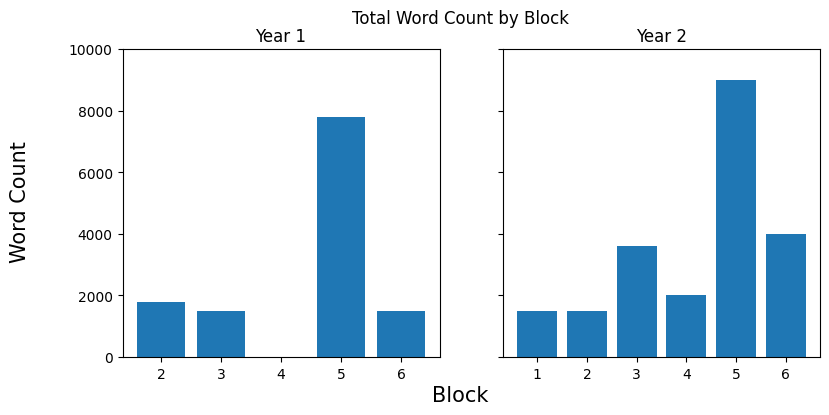

In [12]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

df1 = CombY1[['Block','Word Count']]
df2 = CombY2[['Block','Word Count']]

df1 = df1.dropna(axis=0) #drops entries with no value for word count
df2 = df2.dropna(axis=0)

fig.suptitle("Total Word Count by Block")



g1 = df1.groupby(['Block']).sum()
ax[0].bar(df1['Block'].unique() ,g1['Word Count']) #renaming as blocks 1 and 2 are combined in scheduling
ax[0].set_title("Year 1")
#ax[0].set_xlabel("Block")



g2 = df2.groupby(['Block']).sum()
ax[1].bar(df2['Block'].unique(), g2['Word Count'])
#ax[1].set_xlabel("Block")
ax[1].set_title("Year 2")

ax[0].set_ylim(0,10000)
ax[1].set_ylim(0,10000)
ax[1].tick_params('y', labelleft = False)

fig.text(0.5, 0, 'Block', ha='center', fontsize= 15)
fig.text(0, 0.5, 'Word Count', va='center', rotation='vertical', fontsize= 15)
    

In [13]:
Credited = Combined
Credited["Credit"] = Combined["Credits"] * Combined["Percentage"]

In [14]:

def AssignCategory(Types):

    if 'practical' in Types:
        return "Practical"
    elif 'practical' in Types:
        return "Practical"
    elif 'communication' in Types:
        return 'Communication'
    elif 'reflection' in Types:
        return 'Reflection'
    elif 'theory' in Types:
        return 'Theory'

    if ('report' in Types) | ('code' in Types):
        return "Practical"
    elif ('presentation' in Types) | ('discussion' in Types):
        return "Communication"
    elif ('diary' in Types) | ('reflective' in Types):
        return "Reflection"
    else:
       return "Theory"


cat = []

for s in Credited["Types"]:
    cat.append(AssignCategory(s))

Categorized = Credited
Categorized["Category"] = cat

Text(0.5, 1.0, 'Year 2')

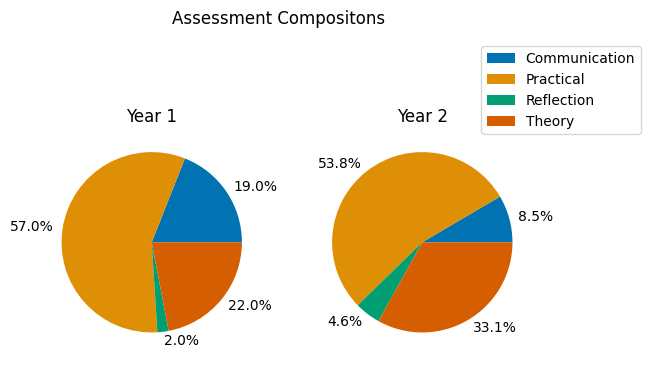

In [15]:
fig, ax = plt.subplots(1,2)

catY1 = Categorized[['Credit','Category']][Combined['Year'] == 1].groupby('Category', as_index=False).sum()
catY2 = Categorized[['Credit','Category']][Combined['Year'] == 2].groupby('Category', as_index=False).sum()
cats = Categorized['Category'].unique()

#l =  + df['Credit'].to_string()

def bakePieChart(df, i):
    l = []
    total = df['Credit'].astype('float').sum()

    for Credit in df['Credit']: #lists values as percentages
      x = round(Credit/total*100,1)
      l.append(str(x) + "%")


    ax[i].pie(df['Credit'], labels=l, colors=sb.color_palette("colorblind"))
    


bakePieChart(catY1, 0)
bakePieChart(catY2, 1)
ax[1].legend(bbox_to_anchor=(1.5, 1.4), labels=cats)

fig.suptitle('Assessment Compositons')
ax[0].set_title('Year 1')
ax[1].set_title('Year 2')


C:\Users\sclark12\AppData\Local\Temp\ipykernel_13736\1024520714.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['','','1/2','3','4','5','6'])


Text(0.05, 0.5, 'Credits')

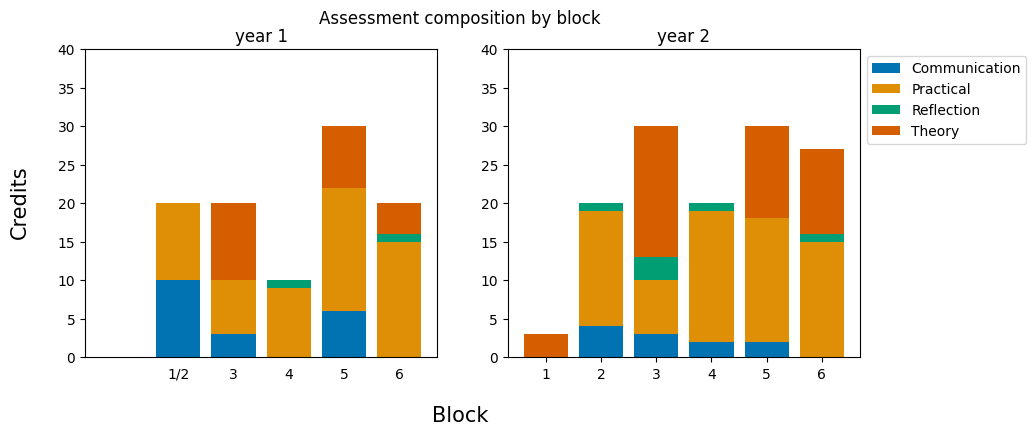

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df1 = Credited[['Block','Category','Credit']][Credited['Year'] == 1].groupby(['Category','Block'], as_index=False).sum()
df1.sort_values(by='Block', ascending=True, inplace=True)

df2 = Credited[['Block','Category','Credit']][Credited['Year'] == 2].groupby(['Category','Block'], as_index=False).sum()
df2.sort_values(by='Block', ascending=True, inplace=True)



def makeStackedGraph(df, n, adjust):
    blocks = df['Block'].unique()
    bottoms = np.zeros(len(blocks)+ adjust) # plus one to account for 2 do not used when extracted for function 

    for i in range(0,len(cats)): # draws stacked bar graph split by category.
        dfmod = df[['Block','Credit']][df['Category'] == cats[i]]    #filters out other categories

        dfmod.reset_index(drop=True, inplace=True)

        for j in range(1, 7): #for blocks with 0 of this category it fills them with 0 value instead of Nan
            if(not (j in dfmod["Block"].values)):
                dfmod.loc[len(dfmod)] = [j, 0]


        dfmod.sort_values(by=['Block'], inplace=True)
        ax[n].bar((dfmod["Block"]), dfmod["Credit"], bottom=bottoms, color=sb.color_palette("colorblind")[i])
        bottoms += dfmod["Credit"].values

    
makeStackedGraph(df1, 0, 1)
makeStackedGraph(df2, 1, 0)

ax[0].set_title("year 1")

ax[0].set_xticklabels(['','','1/2','3','4','5','6'])
ax[0].tick_params(axis="x", bottom = False)


ax[1].set_title("year 2")
ax[1].legend(labels=cats,bbox_to_anchor=(1.0, 1))

ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)

fig.suptitle('Assessment composition by block')

# Bottoms for bars sliding backwards because 1 is actually 1/2
# Could be fixed by handling block as a string?
fig.text(0.5, -0.05, 'Block', ha='center', fontsize= 15)
fig.text(0.05, 0.5, 'Credits', va='center', rotation='vertical', fontsize= 15)
    


In [17]:
def getCatColor(s):
    x = 0
    for cat in cats:
        if s == cat: return sb.color_palette("colorblind")[x]
        x += 1
    
    return None

Text(0.04, 0.5, 'Credits')

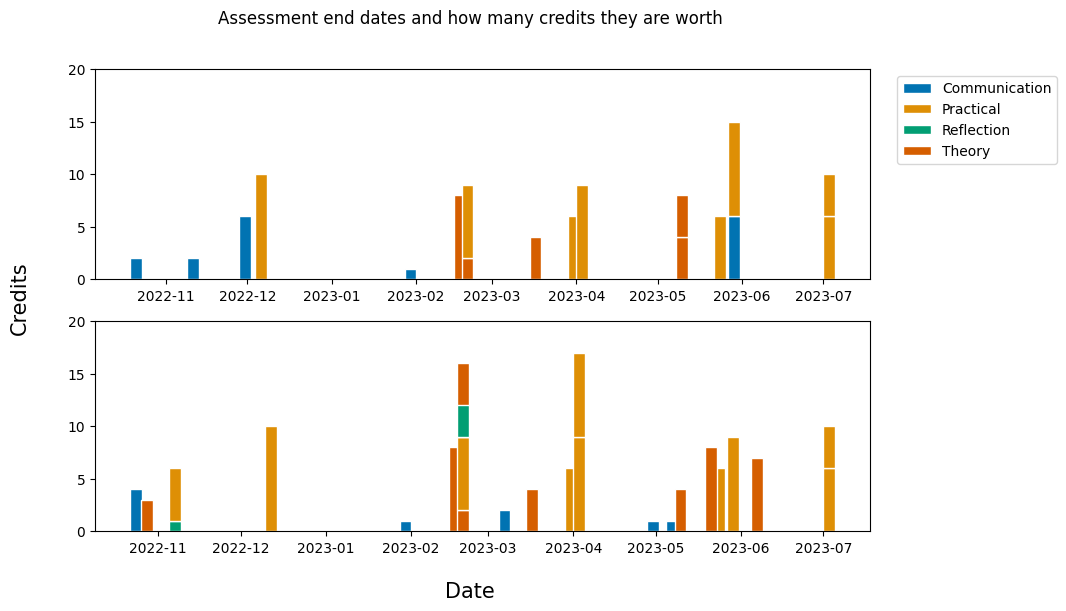

In [18]:
## creates stacked bar chart by date

fig, ax = plt.subplots(2, figsize=(10,6))

#### ExtractDateSharers

def createStackedDateGraph(df, subplot):    
    df = df.sort_values(by = ['EndDate'])
    prev = None

    dateSharers = []

    temp = df.copy()

    for index, row in temp.iterrows(): # removes any entries that are for a date that has already been used and stores them in a seperate sturcture

        if(prev == row['EndDate']):
            dateSharers.append(row)
            #bottoms.append(prevHeight)
            #count += 1
            temp.drop(index, axis='index', inplace=True)

        
        else:
            prev = row['EndDate']
        

    i = 0
    for cat in cats: # places all bars that where not removed coloured by category
        tempCat = temp[temp["Category"] == cat]
        ax[subplot].bar(tempCat["EndDate"], tempCat["Credit"], width=4.3, color=sb.color_palette("colorblind")[i], edgecolor="white")
        i += 1

    i = 0
    for r in dateSharers:

        bottom = temp['Credit'][temp['EndDate'] == r['EndDate']].sum()
        ax[subplot].bar(r["EndDate"], r["Credit"], width=4.3, color=getCatColor(r["Category"]), bottom=bottom, edgecolor="white")
        temp.loc[len(temp)] = r

    ax[subplot].set_ylim(0,20)




createStackedDateGraph(Categorized[Categorized['Year'] == 2], 1)
createStackedDateGraph(Categorized[Categorized['Year'] == 1], 0)

fig.suptitle("Assessment end dates and how many credits they are worth")

ax[0].legend(labels=cats,bbox_to_anchor=(1.25, 1))

fig.text(0.5, 0, 'Date', ha='center', fontsize= 15)
fig.text(0.04, 0.5, 'Credits', va='center', rotation='vertical', fontsize= 15)

In [19]:
Credited[["Course","AssessmentName","Percentage","EndDate","TimeAfterCourseEnd","Category",'OutcomesFulfilled','Credit', 'Block', 'Year']].sort_values(by = ["Year","Block"])


#Credited[["Course","AssessmentName","Percentage","EndDate","Category",'Year']][Credited['Year'] == 2].sort_values(by = ['EndDate'])
Credited.to_clipboard()

<h1>Generate Matrix</h1>

In [25]:
Assessments = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Assessments')
Courses = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Courses')
Outcomes = pd.read_excel(r'..\CollatedAssessments\CollatedAssessments.xlsx', sheet_name='Outcomes')


def GetLOScores(LOs): # takes a string containing a list of learning outcomes and returns the sum of the values from the outcomes table
    l = None

    for LO in LOs.split(', '):

        i = Outcomes[Outcomes["Outcome"] == LO]
        if len(i) != 0: d = i.values[0][1:]
        else:  raise Exception(f"'{LO}' tag is not listed on Outcomes table") # displays an error if an outcome listed in the assessment table is not on the outcomes table

        if l is None: l = d
        else: l += d
    return list(l)


df = Outcomes
df = df.iloc[0:0]                               #clears entries and renames columns
df = df.rename(columns={"Outcome": "Course"})



#Creates Main matrix
for index, row in Courses.iterrows():
    nrow = GetLOScores(row['LearningOutcomes'])
    nrow.insert(0, row['Course'])
    df.loc[index] = nrow

LoMatrix = df.drop_duplicates(keep='first')

#LoMatrix.to_excel('output.xlsx')
# exports files. even if export to a specific sheet this function still overwrites the entire excel document.

#with pd.ExcelWriter('CollatedAssessments.xlsx', engine="openpyxl", mode="a", if_sheet_exists='overlay') as writer:
#    LoMatrix.to_excel(writer, sheet_name="Matrix", index=False)

In [29]:
def createMatrix(l, output):
    df = Outcomes
    df = df.iloc[0:0]                               #clears entries and renames columns
    df = df.rename(columns={"Outcome": "Course"})


    for index, row in l.iterrows():
        nrow = GetLOScores(row['LearningOutcomes'])
        nrow.insert(0, row['Course'])
        df.loc[index] = nrow

    newMatrix = df.drop_duplicates(keep='first')

    newMatrix.to_excel(output)

createMatrix(Courses[Courses['Year'] == 1], 'year1.xlsx')
createMatrix(Courses[Courses['Year'] == 2], 'year2.xlsx')